<a href="https://colab.research.google.com/github/Felipe-Gomes-Amorim/Pokedex/blob/main/PokedexV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação de Pokemons Comuns, Sub-Lendários, Lendários e Míticos Utilizando o modelo de IA: SVM

Pokémons são criaturas fictícias que fazem parte da popular franquia de jogos, animes e outros produtos da série *Pokémon*. Cada Pokémon tem habilidades únicas e pode evoluir para formas mais poderosas. Eles são capturados, treinados e utilizados em batalhas pelos jogadores. Uma classificação importante entre os Pokémons é a distinção entre **lendários** e **não lendários**. Pokémons lendários são raros, poderosos e muitas vezes têm um papel significativo na mitologia do universo Pokémon, como sendo responsáveis por grandes fenômenos naturais ou eventos cósmicos. A classificação entre lendários e não lendários impacta a narrativa dos jogos, a dificuldade de captura e o valor simbólico dessas criaturas no competitivo e na cultura da série.

#Aplicação de Métodos de Aprendizado de Máquina Supervisionado para a classificação de Pokémons utilizando SVM

##Objetivo


Através da utilização de modelos de machine learning, classificar corretamente os pokémons entre: comuns, sub-lendários, lendários e míticos.

##Habilidades Avaliadas

* Preparação e Análise de dados

* Aplicação, Avaliação e Plotagem de Modelos de Machine Learning para Classificação.

##Sobre o Projeto

O projeto foi proposto pelo nosso grupo do curso de Engenharia de Software da Universidade de Mogi das Cruzes (UMC), monitorado pelo Professor Fabiano, como um projeto para a matéria de Inteligência Artificial.

##CheckList

1. Conhecendo a Base de Dados
2. Importação das Bibliotecas
3. Importação e Estruturação do Dataset contendo os 898 Pokémons que serão classificados
4. Regulação da Tabela para treinamento do modelo, Divisão e Padronização dos Dados
5. Escolha e Inicialização do Modelo que será utilizado (SVM)
6. Definição e Uso do GridSearchCV para ver os melhores Parâmetros e Estimadores
7. Segunda Plotagem do Modelo SVM usando apenas os melhores Parâmetros e Estimadores
8. Análise e Plotagem dos dados utilizando a Validação Cruzada dos Dados
9. Permutação dos Dados
10. Plotagem do Modelo SVM usando Matriz de Confusão para analisar os resultados

##Conhecendo a Base de Dados

``national_number``: Número da "Pokédex".

``gen``: Geração (Geração de jogos aonde os pokémons apareceram pela primeira vez).

``english_name``: Nome em inglês (Nome comum).

``japanese_name``: Nome em japonês (Nome original).

``primary_type``: Tipo principal do Pokemon.

``secondary_type``: Tipo secundário do Pokemon.

``classification```: Tipo único do Pokémon.

``percent_male``: Porcentagem da chance do pokémon ser masculino.

``percent_famele``: Porcentagem da chance do pokémon ser feminino.

``height_m``: Altura do Pokémon (em metros).

``weight_kg``: Peso do Pokémon (em quilos).

``capture_rate``: Taxa de porcentagem de captura.

``base_egg_steps``: Quantidade de passos para que o ovo do Pokémon choque.

``hp``: Quantidade de vida do Pokémon.

``attack``: Ataque do Pokémon.

``defense``: Defesa do Pokémon.

``sp_attack``: Ataque especial do Pokémon.

``sp_defense``: Defesa especial do Pokémon.

``speed``: Velocidade do Pokémon.

``abilities_0``: Característica especial principal do Pokémon.

``abilities_1``: Característica especial secundária do Pokémon.

``abilities_2``: Característica especial terciária do Pokémon.

``abilities_hidden``: Característica especial oculta do Pokémon.

``against_normal``: Fraqueza contra tipo Normal.

``against_fire``: Fraqueza contra tipo Fogo.

``against_water``: Fraqueza contra tipo Água.

``against_electric``: Fraqueza contra tipo Elétrico.

``against_grass``: Fraqueza contra tipo Grama.

``against_ice``: Fraqueza contra tipo Gelo.

``against_fighting``: Fraqueza contra tipo Lutador.

``against_poison``: Fraqueza contra tipo Veneno.

``against_ground``: Fraqueza contra tipo Terrestre.

``against_flying``: Fraqueza contra tipo Voador.

``against_psychic``: Fraqueza contra tipo Psíquico.

``against_bug``: Fraqueza contra tipo Inseto.

``against_rock``: Fraqueza contra tipo Pedra.

``against_ghost``: Fraqueza contra tipo Fantasma.

``against_dragon``: Fraqueza contra tipo Dragão.

``against_dark``: Fraqueza contra tipo Escuridão.

``against_steel``: Fraqueza contra tipo Metal.

``against_fairy``: Fraqueza contra tipo Fada.

``is_sublegendary``: Se o Pokémon é "Sub-Lendário".

``is_legendary``: Se o Pokémon é "Lendário".

``is_mythical``: Se o Pokémon é "Mítico".

``evochain_0``: Estágio inicial do Pokémon.

``evochain_1``: Método de evolução do Estágio Inicial do Pokémon.

``evochain_2``: Estágio 2 do Pokémon.

``evochain_3``: Método de Evolução do 2º Estágio do Pokémon.

``evochain_4``: Estágio 3 do Pokémon.

``evochain_5``: Método de Evolução do 3º Estágio do Pokémon.

``evochain_5``: Estágio Final do Pokémon.

OBS: Alguns Pokémons possuem de 1 à 4 Estágios de Evolução, com alguns Pokémons possuindo apenas 1 ou 2 Estágios, em outros o estágio inicial é um ovo.

``gigantamax``: Pokémons que possuem a Evolução "GigantaMax".

``mega_evolution``: Pokémons que possuem uma "Mega Evolução".

``mega_evolution_alt``: Pokémons que possuem uma "Mega Evolução" alternativa.

``description``: Descrição do Pokémon.

##Protótipo de classificação de Pokémons Lendários utilizando o modelo de IA SVM

### Importação das bibliotecas

In [ ]:
# Importação das Bibliotecas que serão utilizadas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



*   Importando
*   Item da lista



### Importação e Estruturação da Tabela contendo os 898 Pokémons


In [ ]:
# Local do dataset que utilizamos para o Modelo:

data_url = 'https://raw.githubusercontent.com/SolverniaSolus/Pokedex/main/pokemon.csv'
df = pd.read_csv(data_url, encoding='utf-16-le', delimiter='\t')

# Colunas do dataset que estão sendo usadas:

column_names = ['national_number',
                'height_m',
                'weight_kg',
                'hp',
                'sp_attack',
                'sp_defense',
                'speed',
                'is_legendary',
                'is_mythical',
                'is_sublegendary'
                ]
df = df[column_names]
df.set_index('national_number', inplace=True)

df['height_cm'] = df['height_m'] * 100
df = df.drop('height_m', axis=1)

# Carregar dados, e selecionar as colunas "national_number e "english_name" como índice da tabela e organizar o DataFrame:

dfRef = pd.read_csv(data_url, encoding='utf-16-le', delimiter='\t')
column_names = ['national_number', 'english_name']
dfRef = dfRef[column_names]
dfRef.set_index('national_number', inplace=True)


df.head()

,weight_kg,hp,sp_attack,sp_defense,speed,is_legendary,is_mythical,is_sublegendary,height_cm
national_number,,,,,,,,,
1,6.9,45,65,65,45,0,0,0,70.0
2,13.0,60,80,80,60,0,0,0,100.0
3,100.0,80,100,100,80,0,0,0,200.0
4,8.5,39,60,50,65,0,0,0,60.0
5,19.0,58,80,65,80,0,0,0,110.0


### Adicionar nova coluna "rarity"

In [ ]:
# Colocar a coluna "rarity" (raridade) para diferenciar os pokémons entre: Comuns, Sub-Lendários, Lendários e Míticos:
df['rarity'] = np.where(df['is_legendary'] == 1, 2,
                        np.where(df['is_mythical'] == 1, 3,
                                 np.where(df['is_sublegendary'] == 1, 1, 0 )))
df.tail(100)

,weight_kg,hp,sp_attack,sp_defense,speed,is_legendary,is_mythical,is_sublegendary,height_cm,rarity
national_number,,,,,,,,,,
799,888.0,223,97,53,43,0,0,1,550.0,1
800,230.0,97,127,89,79,1,0,0,240.0,2
801,80.5,80,130,115,65,0,1,0,100.0,3
802,22.2,90,90,90,125,0,1,0,70.0,3
803,1.8,67,73,67,73,0,0,1,60.0,1
...,...,...,...,...,...,...,...,...,...,...
894,145.0,80,100,50,200,0,0,1,120.0,1
895,200.0,200,100,50,80,0,0,1,210.0,1
896,800.0,100,65,110,30,0,0,1,220.0,1


### Regulação da Tabela para treino do modelo, Divisão e Padronização dos Dados



In [ ]:
# Remover a coluna 'is_legendary' para adicionar ao modelo de treino ("remover o gabarito do modelo para a análise de dados"):

X = df.drop(['is_legendary',
             'is_mythical',
             'is_sublegendary',
             'rarity'],
              axis=1)
y =  df['rarity']
# OBS: A Coluna é "axis = 1" e a Linha é "axis = 0"

# Divisão dos dados entre treino e teste, com proporção de 80% para treino e 20% para testes, utilizando a "semente aleatória" 42:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# Padronização dos dados, para remover dados divergentes:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Escolha e Inicialização do Modelo que será utilizado (SVM) e Validação Cruzada


In [ ]:
#Escolha do Kernel para utilizar no modelo:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

#Validação Cruzada
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(scores)

[0.92361111 0.90277778 0.88888889 0.91608392 0.93006993]


### Plotagem do Modelo SVM usando Matrix de Confusão para observar os resultados

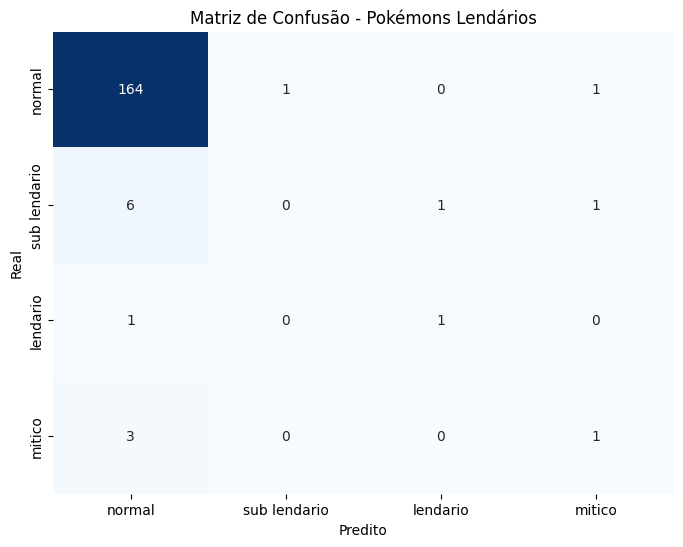

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       166
           1       0.00      0.00      0.00         8
           2       0.50      0.50      0.50         2
           3       0.33      0.25      0.29         4

    accuracy                           0.92       180
   macro avg       0.44      0.43      0.44       180
weighted avg       0.88      0.92      0.90       180



In [ ]:
#Montagem da plotagem da Matriz de Confusão:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Pokémons Lendários')
plt.xlabel('Predito')
plt.ylabel('Real')
xclass = ['normal', 'sub lendario', 'lendario','mitico']
plt.xticks(np.arange(4) + 0.5, xclass)
plt.yticks(np.arange(4) + 0.5, xclass)
plt.show()
print(classification_report(y_test, y_pred))

### Definição e Uso do GridSearchCV para ver os melhores Parâmetros e Estimadores

In [ ]:
# Definição dos parâmetros para o "GridSearchCV":
param_grid = {
    'C': [0.1, 1, 10, 100], # OBS: Margem máxima do hiper plano, quanto menor o "C", menor a margem máxima.
    'gamma': [1, 0.1, 0.01, 0.001], # OBS: "Aura" dos pontos coordenados, quanto maior a "aura", mais relativos são os pontos, quanto menor, mais individuais.
    'kernel': ['linear','rbf', 'poly']
}

# Instanciar o modelo SVM
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='accuracy')
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [ ]:
# Exibir os melhores parâmetros
print('Melhores parâmetros: ', grid.best_params_)
print('Melhor estimador: ', grid.best_estimator_)

Melhores parâmetros:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Melhor estimador:  SVC(C=10, gamma=1, kernel='linear')


### Segunda Plotagem do Modelo SVM Usando dos melhores Parâmetros e Estimadores

Acertos:  national_number
494    3
483    2
Name: rarity, dtype: int64
                english_name
national_number             
494                  Victini
483                   Dialga

 
 
 Erros:  national_number
639    1
894    1
799    1
245    1
743    0
808    3
721    3
773    1
381    1
641    1
798    1
790    2
719    3
897    0
Name: rarity, dtype: int64
                english_name
national_number             
639                Terrakion
894                Regieleki
799                 Guzzlord
245                  Suicune
743                 Ribombee
808                   Meltan
721                Volcanion
773                 Silvally
381                   Latios
641                 Tornadus
798                  Kartana
790                  Cosmoem
719                  Diancie
897                Spectrier


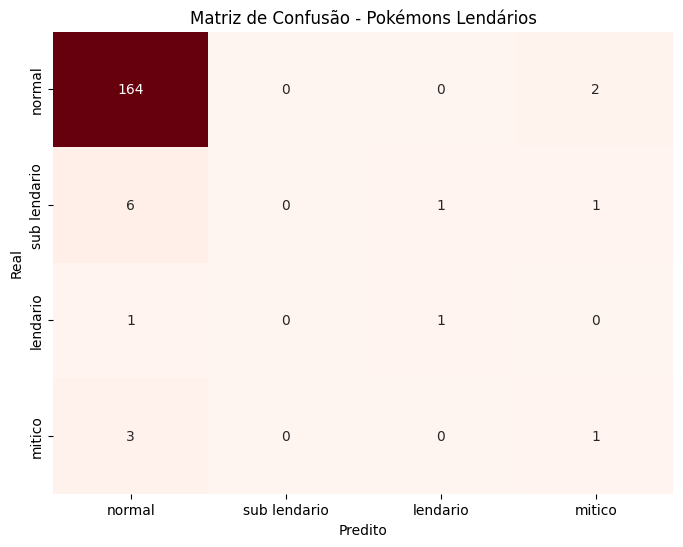

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       166
           1       0.00      0.00      0.00         8
           2       0.50      0.50      0.50         2
           3       0.25      0.25      0.25         4

    accuracy                           0.92       180
   macro avg       0.42      0.43      0.43       180
weighted avg       0.88      0.92      0.90       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Previsões da grade com o modelo otimizado:
grid_predictions = grid.predict(X_test_scaled)

acertos = y_test[((y_test == grid_predictions) & (y_test > 0)) ]
print('Acertos: ',acertos)
print(dfRef.loc[acertos.index])

errors = y_test[(y_test != grid_predictions) ]
print('\n \n \n Erros: ', errors)
print(dfRef.loc[errors.index])


# Nova matriz de confusão e relatório de classificação:
conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Matriz de Confusão - Pokémons Lendários')
plt.xlabel('Predito')
plt.ylabel('Real')
xclass = ['normal', 'sub lendario', 'lendario','mitico']
plt.xticks(np.arange(4) + 0.5, xclass)
plt.yticks(np.arange(4) + 0.5, xclass)
plt.show()

print(classification_report(y_test, grid_predictions))

### Permutação para mostrar as Features mais importantes

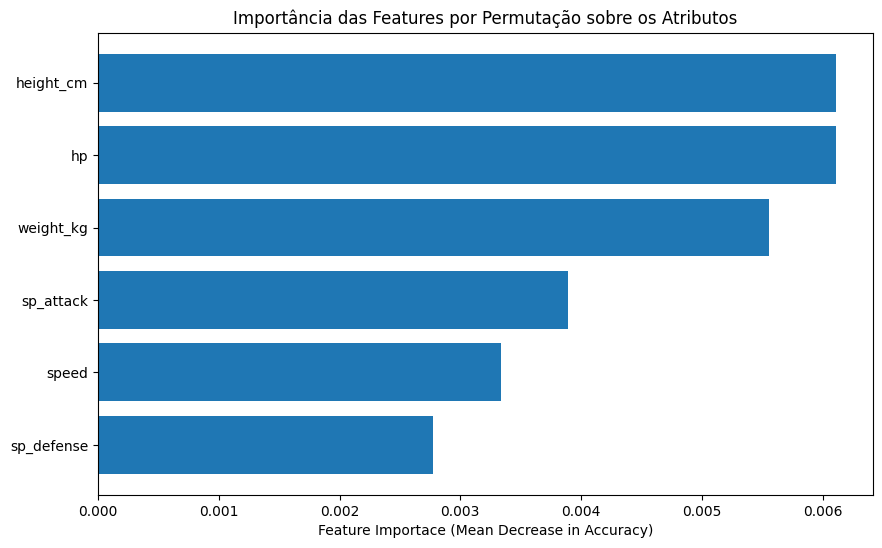

In [ ]:
# Realizar a permutação dos dados para análise:
result =  permutation_importance(model,X_test_scaled,y_test,n_repeats=10,random_state=32)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importace (Mean Decrease in Accuracy)')
plt.title('Importância das Features por Permutação sobre os Atributos')
plt.show()

In [ ]:
# Mostrar índices, comparação das features e acurácia da classificação, mostrando Falso Positivos, Falso Negativos e Corretamente Classificados:
fp_indices = np.where((grid_predictions == 1) & (y_test == 0))[0]
fn_indices = np.where((grid_predictions == 0) & (y_test == 1))[0]
fp_samples = X_test.iloc[fp_indices]
fn_samples = X_test.iloc[fn_indices]
correctly_classified_samples = X_test[(grid_predictions == y_test)]
fp_mean = fp_samples.mean()
fn_mean = fn_samples.mean()
correctly_classified_mean = correctly_classified_samples.mean()
comparison_df = pd.DataFrame({
    'False Positives': fp_mean,
    'False Negatives': fn_mean,
    'Correctly Classified': correctly_classified_mean
})
print('Comparação das F:')
print(comparison_df)

print(grid_predictions)

Comparação das F:
            False Positives  False Negatives  Correctly Classified
weight_kg               NaN       111.766667             54.128916
hp                      NaN        84.000000             67.367470
sp_attack               NaN        95.166667             65.879518
sp_defense              NaN        86.833333             67.156627
speed                   NaN       103.000000             62.361446
height_cm               NaN       166.666667            106.325301
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]


##Agradecimentos
Nosso grupo agradece pela atenção, e esperamos que tenha gostado do nosso projeto. Esperamos que ele tenha sido útil e informativo para o seu aprendizado.
Qualquer dúvida ou sugestão, entre em contato conosco pelo nosso LinkedIn, e verifique outros projetos em nosso GitHub.